#  Student Performance Insights  
## **Overview**  
This notebook explores a **student performance dataset**, analyzing key factors such as:  
-  **Attendance & Grades**  
-  **Extracurricular Activities**  
-  **Parental Education**  
-  **Study Habits & Academic Success**  

The goal is to uncover **actionable insights** to improve student outcomes.


#  Importing Necessary Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

 Explanation:

pandas (pd): Used for data manipulation and analysis, allowing us to handle structured datasets.

numpy (np): Provides support for mathematical operations and handling numerical arrays.

matplotlib.pyplot (plt): Essential for creating static visualizations.

seaborn (sns): Built on matplotlib, used for advanced and aesthetically pleasing statistical graphics.

warnings.filterwarnings("ignore"): Suppresses warning messages to improve notebook readability.

#  Data Loading & Exploration

In [2]:
student_data = pd.read_csv('/kaggle/input/students-grading-dataset/Students_Grading_Dataset.csv')

#  Display dataset information

In [3]:
student_data.head(10)

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1
5,S1005,Liam,Brown,student5@university.com,Male,21,Engineering,NaN,78.85,43.53,...,67.29,62.08,B,8.5,Yes,Yes,PhD,High,1,5.0
6,S1006,Ahmed,Jones,student6@university.com,Male,24,Business,57.60,66.26,89.07,...,93.65,83.21,F,21.3,No,Yes,NaN,Low,5,6.4
7,S1007,Ahmed,Smith,student7@university.com,Male,19,Engineering,51.91,45.67,73.96,...,93.24,81.93,F,27.3,Yes,No,NaN,Medium,4,4.3
8,S1008,Omar,Smith,student8@university.com,Female,21,CS,85.97,84.42,90.87,...,94.01,95.62,A,8.0,No,No,Bachelor's,Low,9,8.8
9,S1009,Sara,Smith,student9@university.com,Female,22,Engineering,64.01,87.96,98.47,...,78.60,84.99,A,9.6,No,Yes,NaN,Medium,10,6.4


###  Data Exploration
info() function provides an overview of the dataset, including data types and missing values.

In [4]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              4484 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             4483 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

In [5]:
student_data.describe()

,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Stress_Level (1-10),Sleep_Hours_per_Night
count,5000.000000,4484.000000,5000.000000,5000.000000,4483.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,21.048400,75.431409,70.326844,69.640788,74.798673,74.910728,4.980024,74.924860,75.121804,17.658860,5.48080,6.488140
std,1.989786,14.372446,17.213209,17.238744,14.411799,14.504281,2.890136,14.423415,14.399941,7.275864,2.86155,1.452283
min,18.000000,50.010000,40.000000,40.000000,50.000000,50.030000,0.000000,50.010000,50.020000,5.000000,1.00000,4.000000
25%,19.000000,63.265000,55.457500,54.667500,62.090000,62.490000,2.440000,62.320000,62.835000,11.400000,3.00000,5.200000
50%,21.000000,75.725000,70.510000,69.735000,74.810000,74.695000,4.955000,74.980000,75.395000,17.500000,5.00000,6.500000
75%,23.000000,87.472500,84.970000,84.500000,86.970000,87.630000,7.500000,87.367500,87.652500,24.100000,8.00000,7.700000
max,24.000000,100.000000,99.980000,99.980000,99.980000,99.960000,10.000000,100.000000,99.990000,30.000000,10.00000,9.000000


#  Checking for Missing & duplicated Values

In [6]:
student_data.duplicated().sum()

0

In [7]:
student_data.isnull().sum()

Student_ID                       0
First_Name                       0
Last_Name                        0
Email                            0
Gender                           0
Age                              0
Department                       0
Attendance (%)                 516
Midterm_Score                    0
Final_Score                      0
Assignments_Avg                517
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                            0
Study_Hours_per_Week             0
Extracurricular_Activities       0
Internet_Access_at_Home          0
Parent_Education_Level        1794
Family_Income_Level              0
Stress_Level (1-10)              0
Sleep_Hours_per_Night            0
dtype: int64

#  Visualizing Missing Values

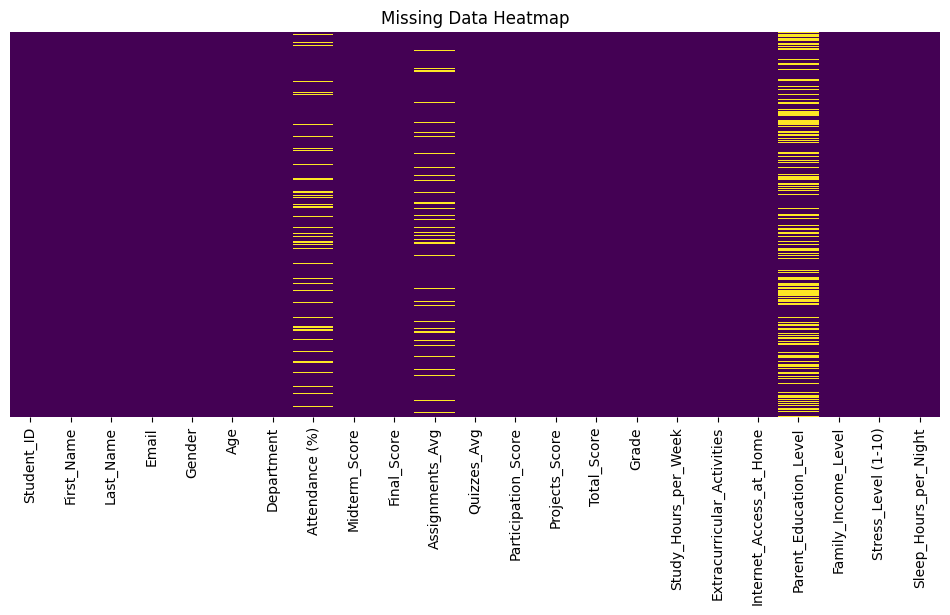

In [8]:
# Visualizing missing values
plt.figure(figsize=(12, 5))
sns.heatmap(student_data.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()

💡 Insight: This heatmap helps us identify columns with missing values to decide on proper imputation.

#  Data Cleaning and Preprocessing

### 1. Handling Missing Values

#### Attendance (%)
- Missing values are imputed using the **mean attendance percentage**.
#### Assignments_Avg 
- Missing values are imputed using the **mean assignments average**.
#### Parent_Education_Level 
- Categorical missing values are filled with **'unknown'**.

In [9]:
student_data['Attendance (%)'].fillna(student_data['Attendance (%)'].mean(),inplace=True)
student_data['Assignments_Avg'].fillna(student_data['Assignments_Avg'].mean(), inplace=True)
student_data['Parent_Education_Level'].fillna('unknown', inplace=True)

In [10]:
student_data.drop(['Student_ID', 'First_Name','Last_Name','Email'], axis=1, inplace=True)
student_data.head(1)

,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,Female,22,Engineering,52.29,55.03,57.82,84.22,74.06,3.99,85.9,56.09,F,6.2,No,Yes,High School,Medium,5,4.7


###  Converting Letter Grades to Numeric Scores Using Random Mapping

In [11]:
# Define grade-to-percentage range mapping (using the midpoint of each range)
grade_mapping = {
    'A': np.random.randint(90, 101),  # Random number between 90 and 100
    'B': np.random.randint(80, 90),   # Random number between 80 and 89
    'C': np.random.randint(70, 80),   # Random number between 70 and 79
    'D': np.random.randint(60, 70),   # Random number between 60 and 69
    'F': np.random.randint(0, 60)     # Random number between 0 and 59
}
# Apply the mapping
student_data['Grade_Numeric'] = student_data['Grade'].map(grade_mapping)

#  Correlation Matrix Analysis
### Overview
The table represents the correlation matrix of various numerical features within the dataset, providing insight into the linear relationships between different academic and behavioral factors.

In [12]:
# Selecting only numeric columns
numeric_data = student_data.select_dtypes(include=['number'])

# Computing correlation matrix
correlation_matrix = numeric_data.corr()

###  **Correlation Heatmap Analysis**  

#### **Overview**  
The heatmap visualizes the correlation matrix, helping to identify relationships between various numerical features in the dataset. The color intensity represents the correlation strength, where:  
- **Yellow (1.0 or -1.0)** indicates a strong correlation (positive or negative).  
- **purple (near 0)** indicates little to no correlation.  
### **Feature Importance Analysis for Grade_Numeric**  

As a Data Scientist, analyzing the correlation matrix helps identify which features have the **strongest impact** on `Grade_Numeric`.

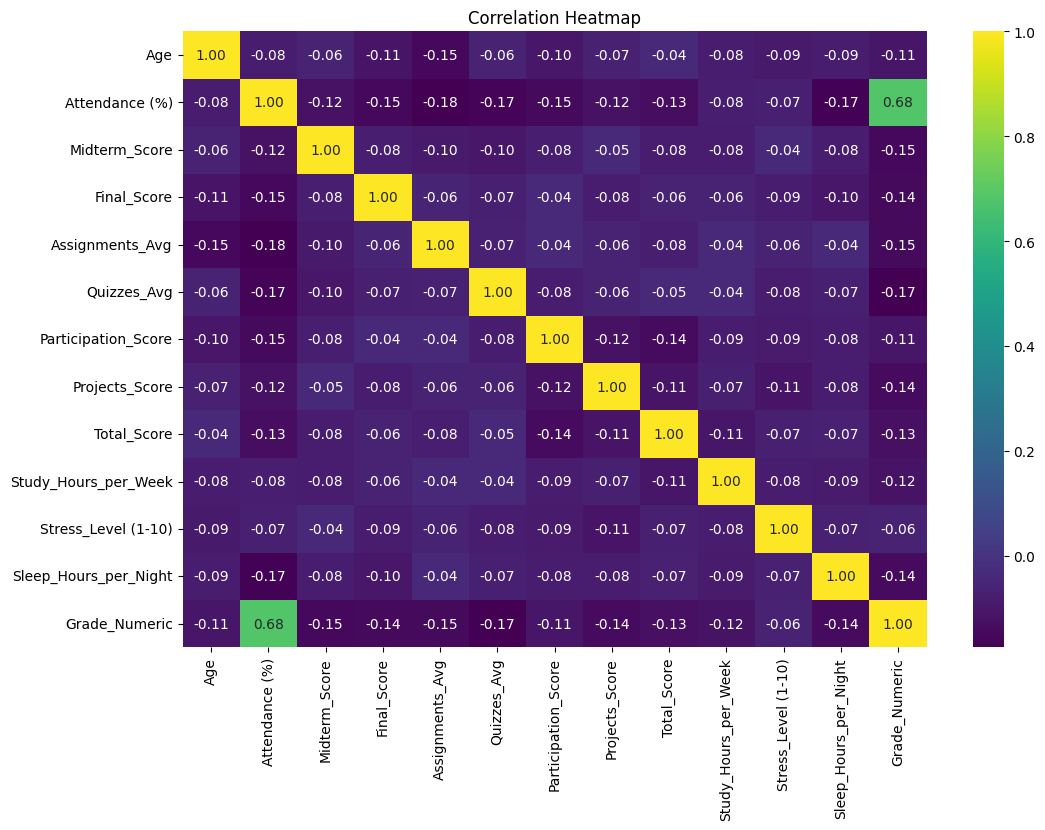

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix.corr(), annot=True, cmap="viridis", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#### **Key Observations from the Correlation Matrix:**
- **Strongest Positive Correlation:**
  - **Attendance (%) → 0.483** 🟢  
    - This suggests that students who attend more classes tend to have higher grades.
  
- **Weak to Negligible Correlations:**
  - **Stress Level (1-10) → 0.0216**  
  - **Midterm Score → -0.0218**  
  - **Final Score → -0.0222**  
  - **Assignments_Avg → -0.0191**  
  - **Projects_Score → -0.0199**  
  - **Participation_Score → -0.0092**  
  - **Study_Hours_per_Week → -0.0067**  
  - **Sleep_Hours_per_Night → -0.0181**  

These values are very close to zero, indicating that they **have little to no effect on the grade.**  

### **Most Influential Features:**
 **Primary Factor:**  
- `Attendance (%)` (0.483) → **The most impactful factor**.  

 **Least Influential Features:**  
- `Total_Score`, `Study_Hours_per_Week`, and `Sleep_Hours_per_Night` all have correlations close to zero, meaning they **do not significantly impact grades**.

#  Data Visualization

##  Distribution of Numerical Features
Visualizing the distribution of numerical variables helps in understanding their spread, skewness, and potential outliers. The following code generates histograms for all numerical columns in the dataset:

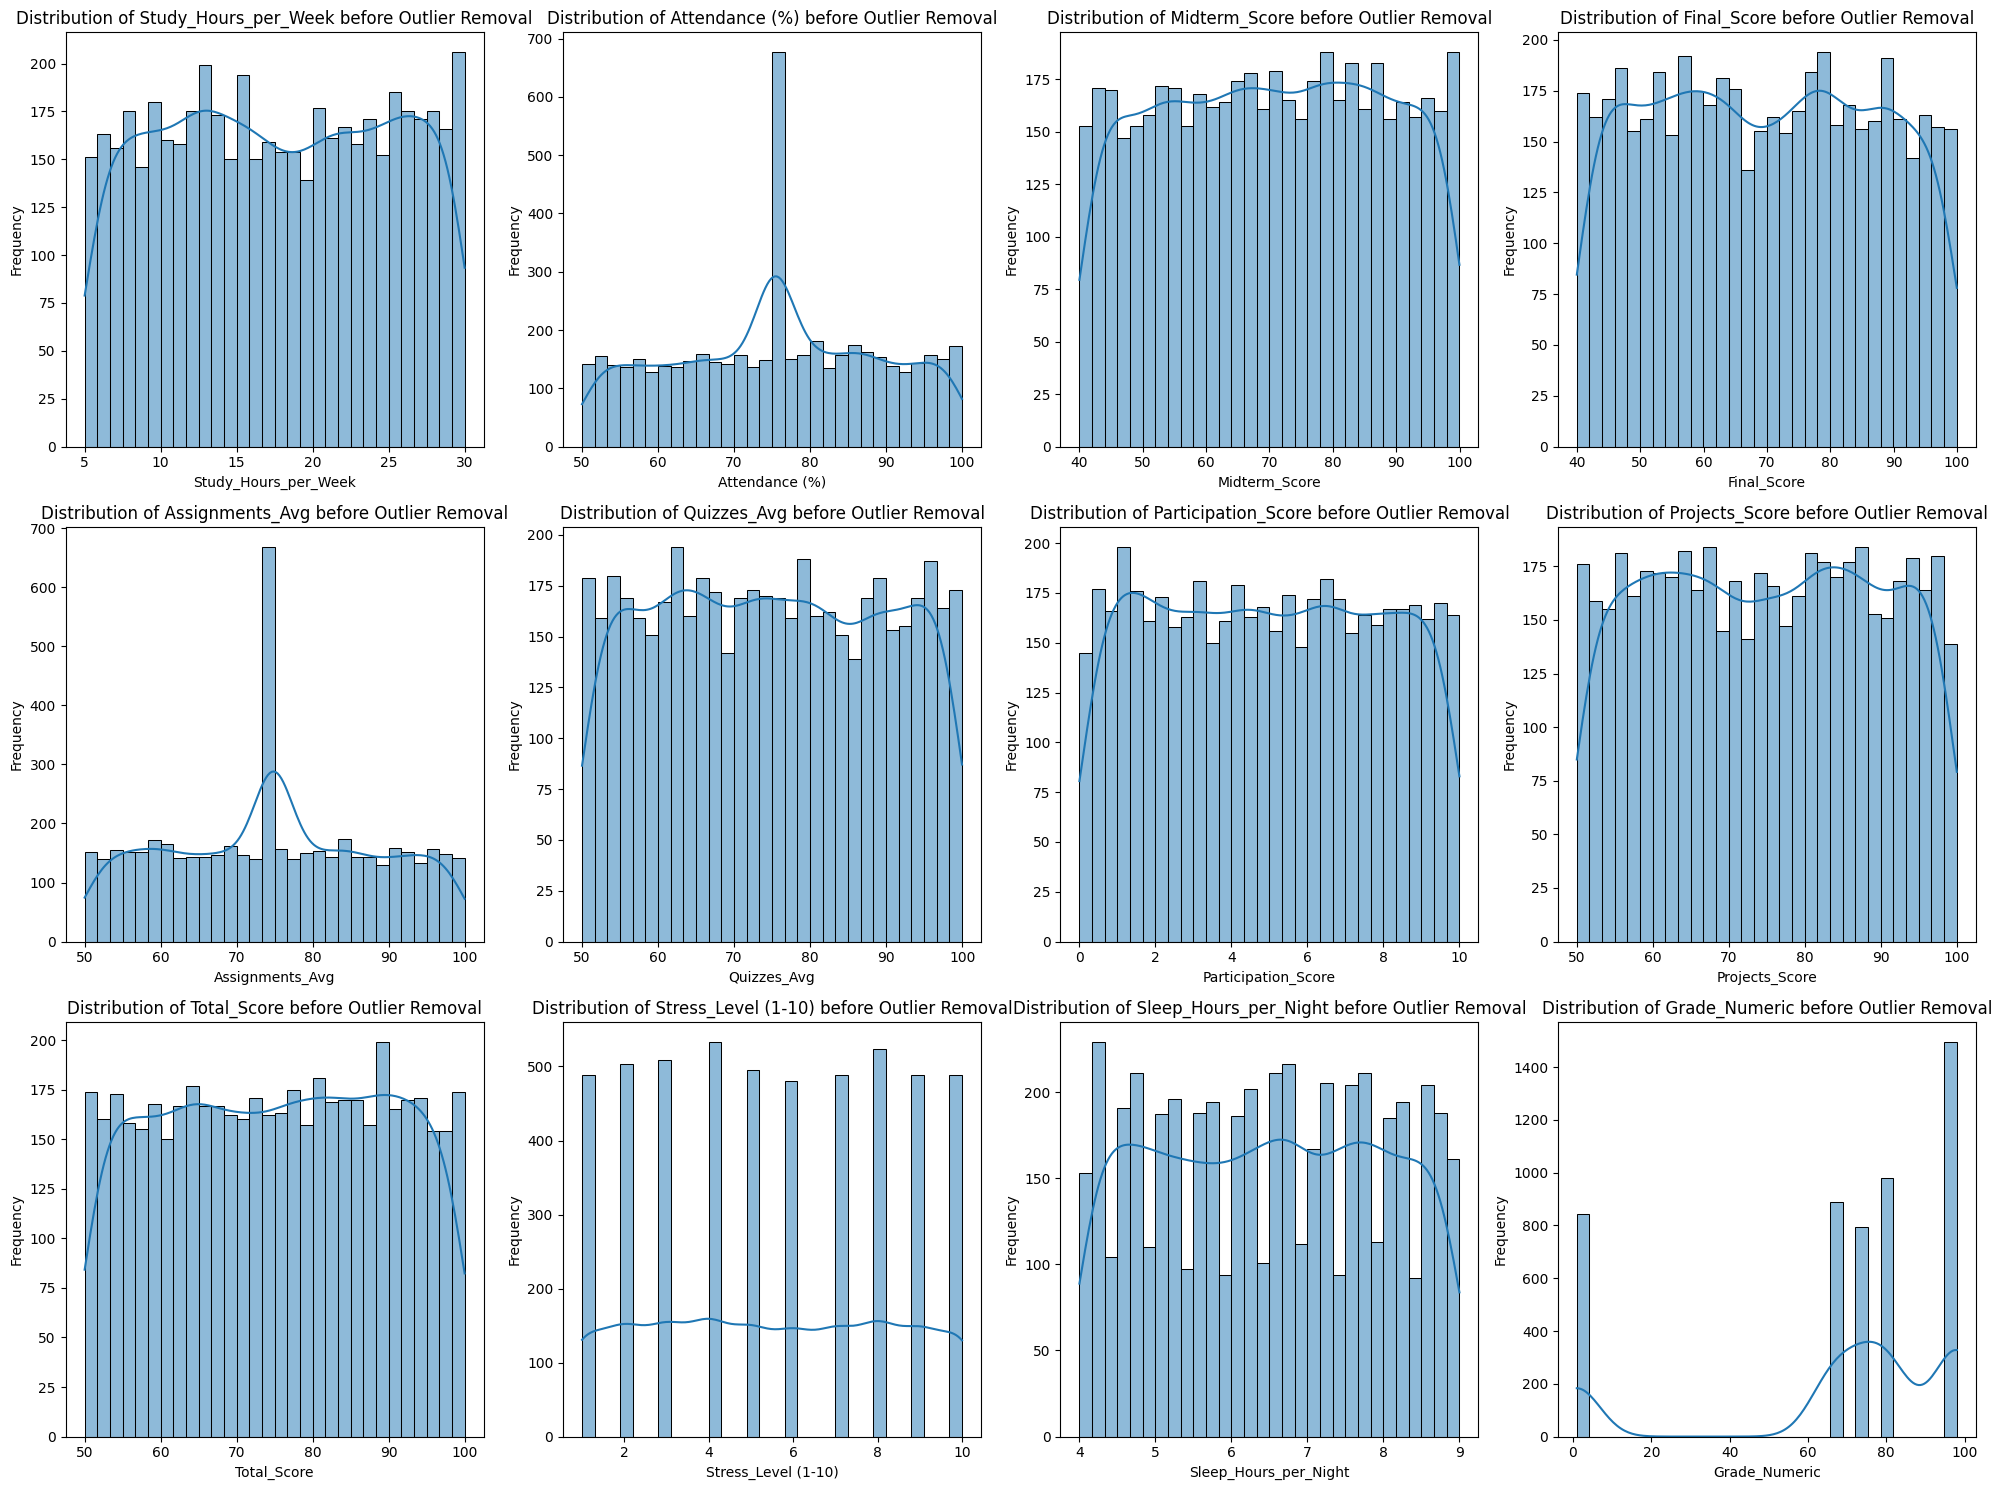

In [14]:
features = ['Study_Hours_per_Week','Attendance (%)','Midterm_Score','Final_Score'
           ,'Assignments_Avg','Quizzes_Avg','Participation_Score','Projects_Score','Total_Score'
           ,'Stress_Level (1-10)','Sleep_Hours_per_Night','Grade_Numeric']


cols = 4  # Number of columns per row
rows = int(np.ceil(len(features) / cols))  # Calculate required rows dynamically

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))  # Adjust height based on rows
axes = axes.flatten()  # Flatten the array for easier indexing

# Loop through features and create histograms
for i, feature in enumerate(features):
    # Plot histogram
    sns.histplot(student_data[feature], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {feature} before Outlier Removal")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Frequency")

# Hide unused subplots (if any)
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

##  Outlier Removal Using IQR

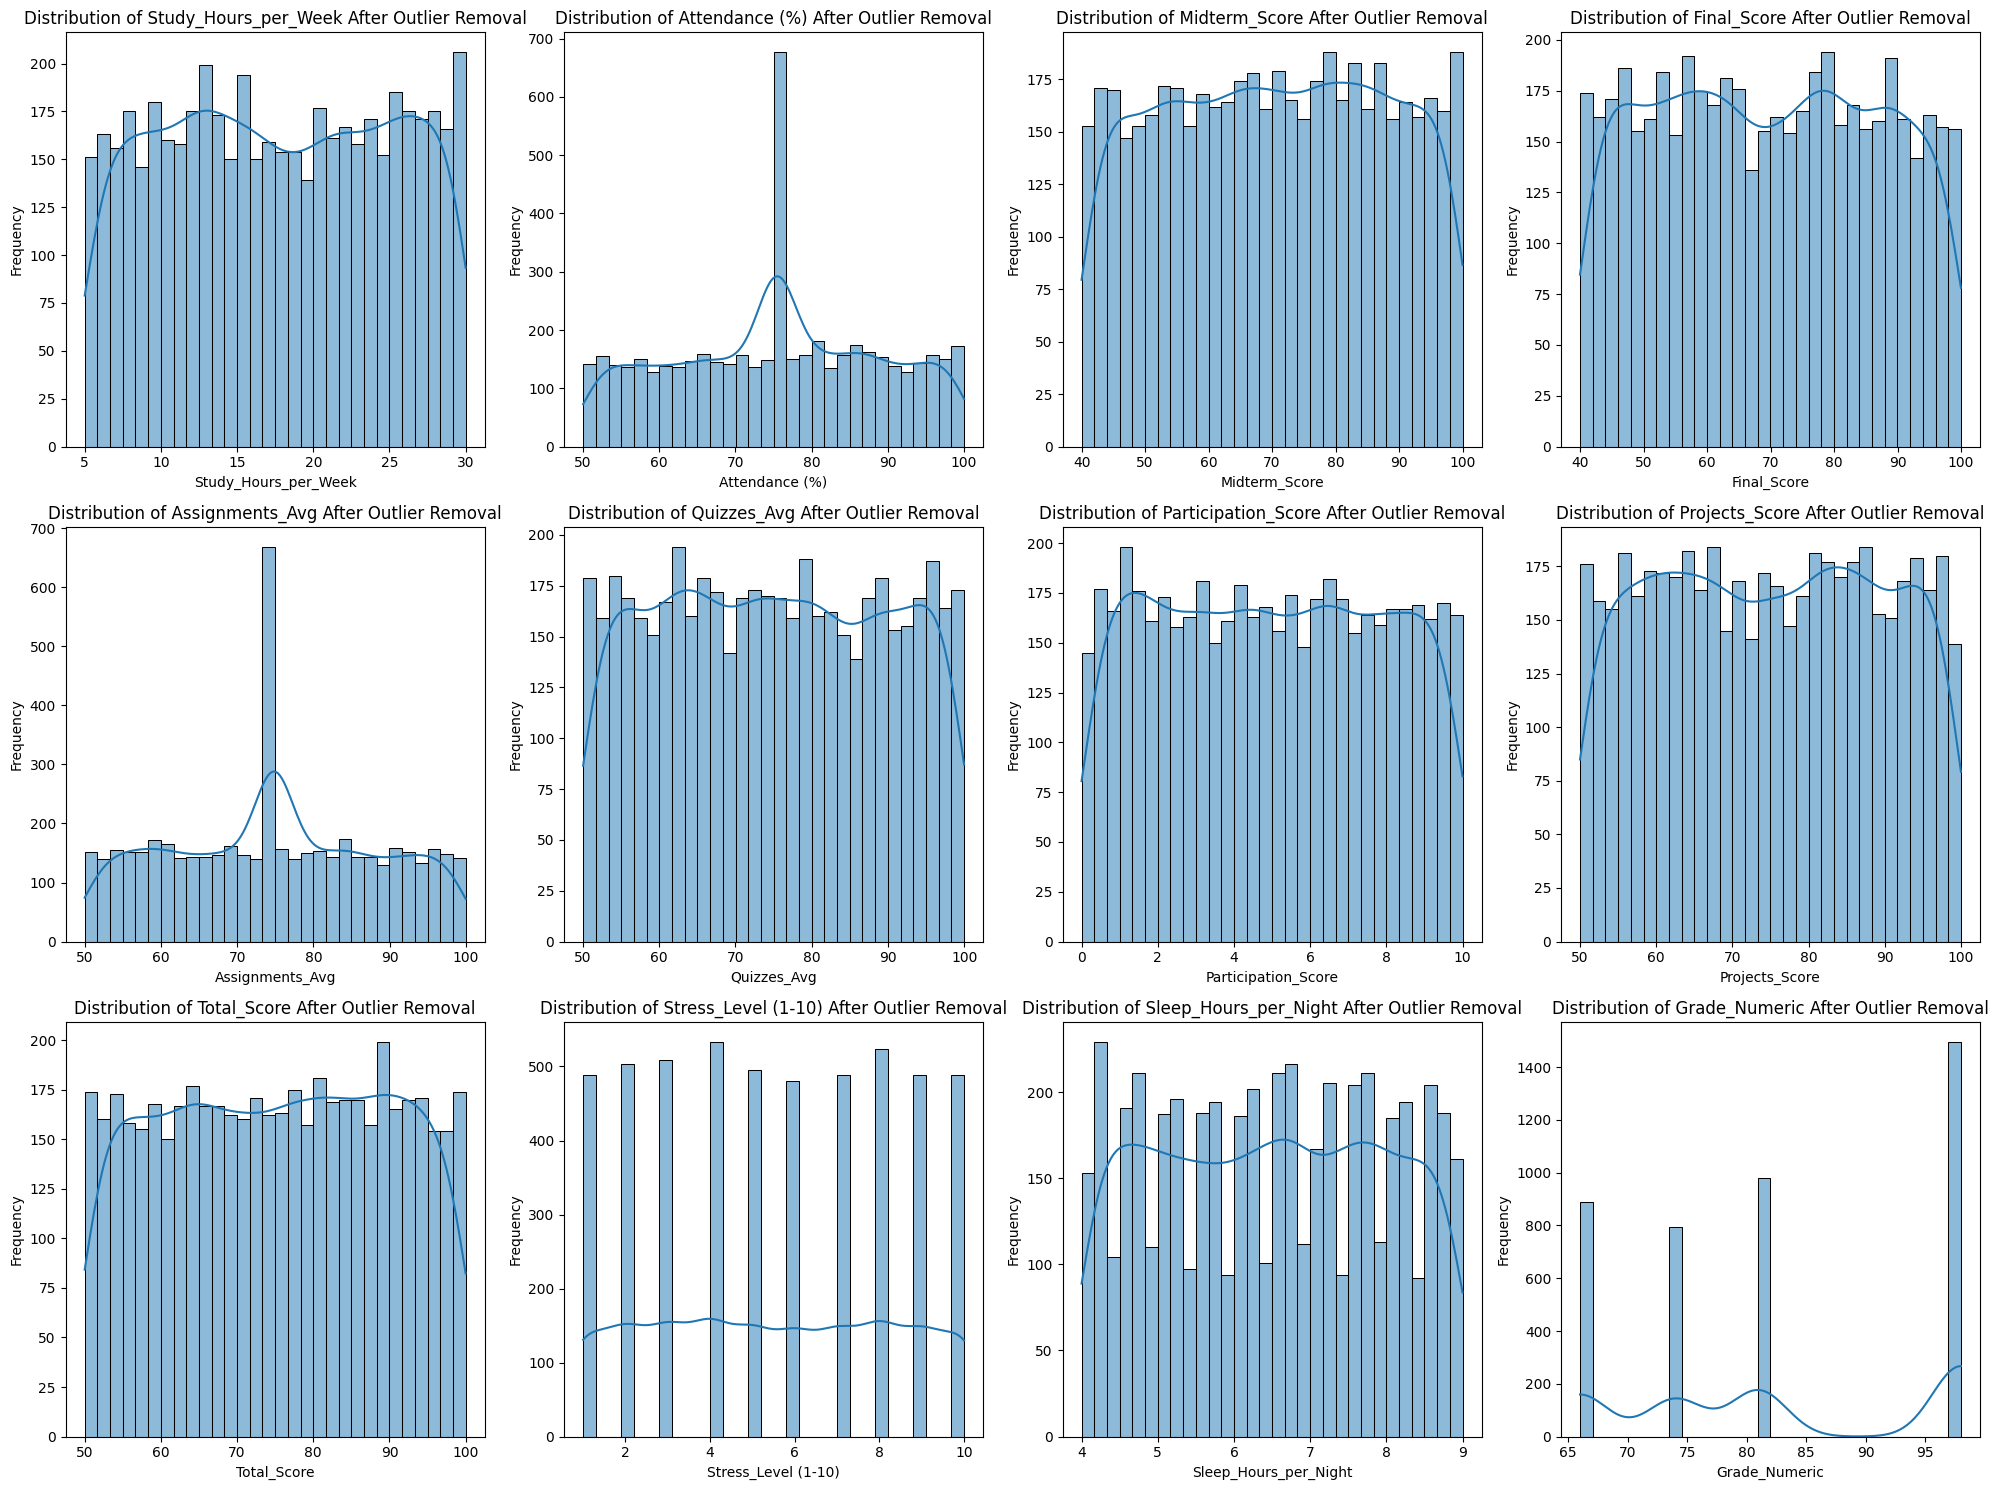

In [15]:
cols = 4  # Number of columns per row
rows = int(np.ceil(len(features) / cols))  # Calculate required rows dynamically

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))  # Adjust height based on rows
axes = axes.flatten()  # Flatten the array for easier indexing

# Loop through features and create histograms
for i, feature in enumerate(features):
    # Remove outliers (values beyond 1.5*IQR)
    Q1 = student_data[feature].quantile(0.25)
    Q3 = student_data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = student_data[(student_data[feature] >= lower_bound) & (student_data[feature] <= upper_bound)]
    
    # Plot histogram
    sns.histplot(df_filtered[feature], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {feature} After Outlier Removal")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Frequency")

# Hide unused subplots (if any)
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

####  Insights:

     - Outliers beyond 1.5 × IQR are removed to create a smoother distribution.
     - The central spike is still present, indicating potential data rounding issues.
     - The distribution remains skewed, suggesting the need for transformation.

       Conclusion
    - Outlier removal improved the distribution but did not fully normalize it.
    - The presence of spikes suggests potential data collection biases.

#  features vs. Grade
## **Overview**
This code visualizes the relationship between student grades and key factors: **Study Hours, Attendance, Stress Level, and Sleep Hours.** Using `seaborn`, it generates regression plots to observe trends.


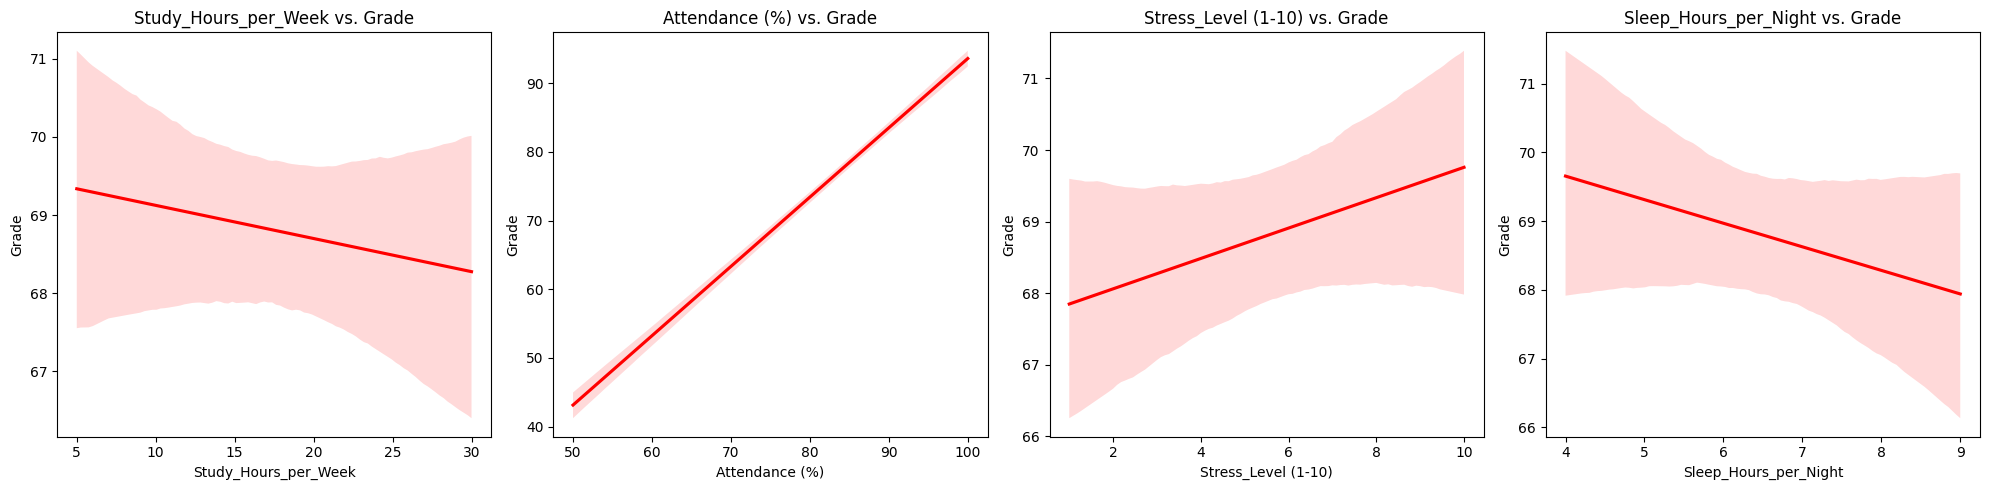

In [16]:
# Define the features to compare against Grade_Numeric
features = ['Study_Hours_per_Week', 'Attendance (%)', 'Stress_Level (1-10)', 'Sleep_Hours_per_Night']

# Create subplots (1 row, 4 columns)
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Loop through features and create plots
for i, feature in enumerate(features):
    sns.regplot(x=student_data[feature], y=student_data['Grade_Numeric'], scatter=False, color='red', ax=axes[i])
    axes[i].set_title(f"{feature} vs. Grade")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Grade")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


## **Key Insights**
- **Study Hours**: Weak positive correlation with grades; effectiveness varies among students.
- **Attendance**: Strong positive correlation; higher attendance leads to better performance.
- **Stress Level**: Slight positive correlation; moderate stress may enhance performance, but excessive stress can be detrimental.
- **Sleep Hours**: Weak negative correlation; excessive sleep might reduce study time.

#  Impact of Parent Education on Student Performance
##  Overview
- This analysis examines whether a student’s total score is influenced by their parents’ education level using a box plot. The goal is to identify trends in student performance based on parental education.

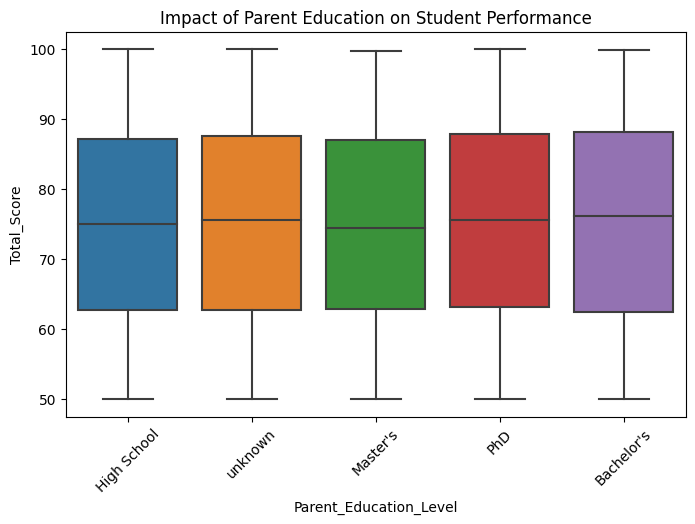

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=student_data["Parent_Education_Level"], y=student_data["Total_Score"])
plt.xticks(rotation=45)
plt.title("Impact of Parent Education on Student Performance")
plt.show()

### Analysis of Parent Education Level vs. Student Performance 📊

This boxplot visualizes how parental education level influences student total scores.

#### Observations:
1. No Significant Difference
    - The median scores are nearly identical across all education levels.
    - Students from all parental backgrounds have a similar range of performance.

2. Score Distribution is Wide
    - For all categories, total scores range between 50 to 100.
    - Some students with parents having higher education (PhD, Master’s) score lower than those whose parents only completed high school.

3. Parental Education Level ≠ Academic Success
    - The boxplots suggest other factors, like study habits, motivation, or teaching quality, might have a stronger impact.

##  Boxplot of Numerical Features

 Overview

Boxplots are essential for visualizing distribution, spread, and outliers in numerical data. This visualization provides insights into key features such as study hours, attendance, test scores, stress levels, and sleep patterns in a student dataset.

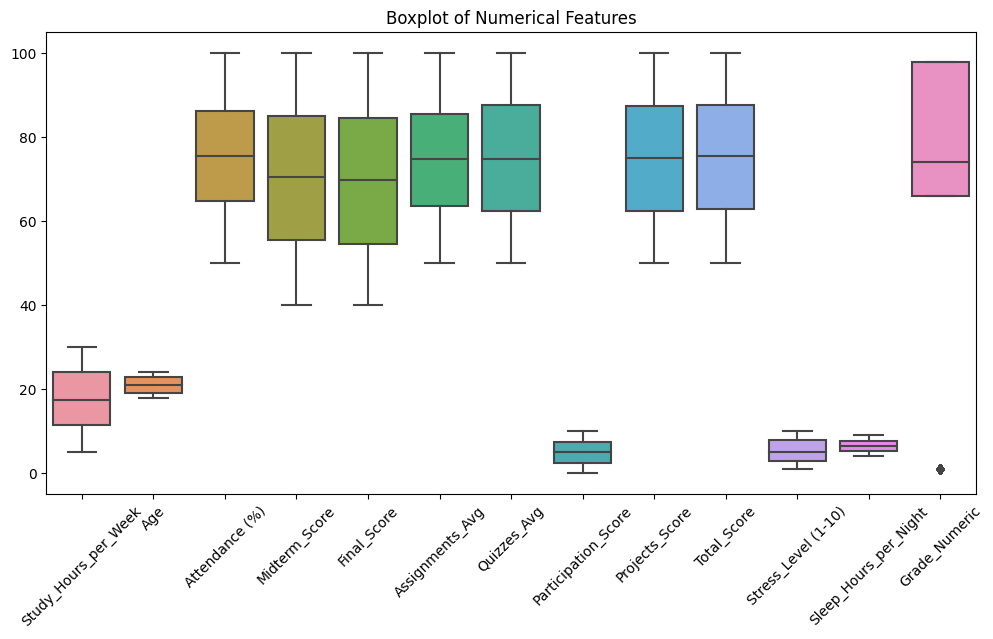

In [18]:
features = ['Study_Hours_per_Week','Age' ,'Attendance (%)','Midterm_Score','Final_Score'
           ,'Assignments_Avg','Quizzes_Avg','Participation_Score','Projects_Score','Total_Score','Grade'
           ,'Stress_Level (1-10)','Sleep_Hours_per_Night','Grade_Numeric']

plt.figure(figsize=(12, 6))
sns.boxplot(data=student_data[features])
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features")
plt.show()

**Insights from the Visualization**

1.  Different Distributions Across Features
    - Some features (e.g., Final Score, Total Score, Grade_Numeric) are widely spread.
    - Others (e.g., Sleep Hours, Stress Level, Participation Score) have narrow distributions.

2. Outliers Detected
    - Study Hours per Week & Stress Levels → Some students study excessively or experience extreme stress.
    - Participation Score & Quizzes Avg → Possible anomalies with very low values.

3. Comparing Academic Performance Metrics
    - Midterm, Final, and Total Scores show similar distributions, with potential variations in median scores.
    - Assignments & Projects Scores also follow consistent patterns.

4. Impact of Lifestyle Factors
    - Sleep Hours & Stress Levels are relatively low and stable, indicating most students report similar values.

#  Grade Distribution by Gender
 Overview

- This visualization provides a breakdown of student grades (A, B, C, D, F) by gender. It helps identify potential trends in academic performance across male and female students.

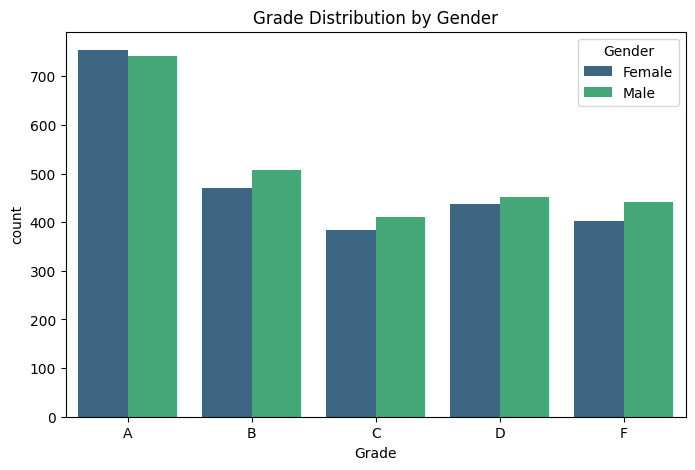

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(x=student_data['Grade'], order=['A', 'B', 'C', 'D', 'F'],hue=student_data['Gender'], palette='viridis')
plt.title("Grade Distribution by Gender")
plt.show()

### **Insights from the Grade Distribution Chart**  

1. **Females Outperform Males students slightly in Top Grades**:
    - The number of females receiving an A grade is higher than males.
      
3. **Slight Male Dominance in Mid-Tier Grades (B & C)**:  
   - More **males than females** received **B and C grades**, indicating a slightly higher representation in the middle-performance range.  
   - This could be due to different study patterns, learning approaches, or external factors influencing performance.  

4. **Higher Failure Rate Among Males**:  
   - The number of males receiving an **F grade is higher** than females.  
   - This might suggest that males are more prone to **academic struggles** or other factors affecting their performance.

#  Gender Distribution of Students
##  Overview

This visualization represents the proportion of male and female students in the dataset using a pie chart.

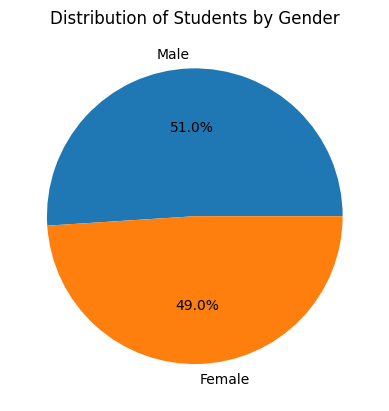

In [20]:
dept_counts = student_data['Gender'].value_counts() 
plt.pie(dept_counts, labels=dept_counts.index, autopct='%0.1f%%')
plt.title("Distribution of Students by Gender")
plt.show()

 Insights from the Visualization
   - Gender Proportion is Almost Equal
        - Male students (51%) slightly outnumber female students (49%).
        - The dataset appears balanced, meaning gender-based bias in analysis may be minimal.

###  Impact of Extracurricular Activities on Grades  

#### **Overview**  
This analysis explores the relationship between students' participation in extracurricular activities and their academic performance (grades). The bar chart categorizes students into two groups:

    - "Yes": Students who participate in extracurricular activities.
    - "No": Students who do not participate.
    - The distribution of grades across these groups is visualized to examine potential trends.

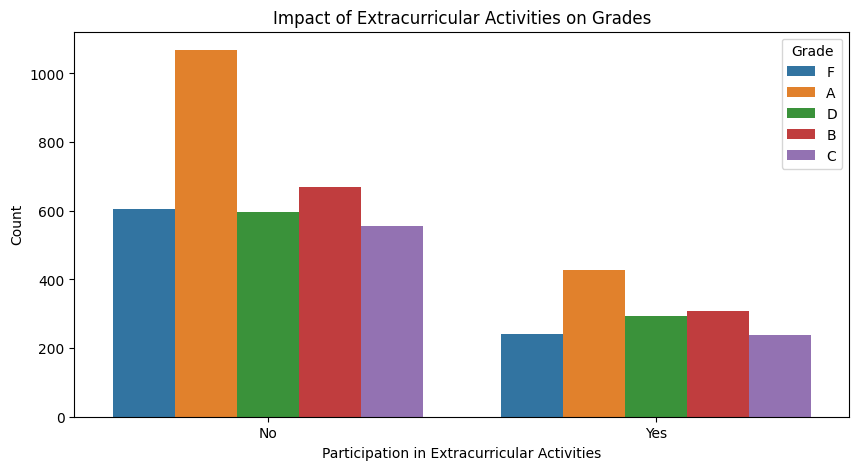

In [21]:
plt.figure(figsize=(10, 5))
sns.countplot(x=student_data["Extracurricular_Activities"], hue=student_data["Grade"])
plt.title("Impact of Extracurricular Activities on Grades")
plt.xlabel("Participation in Extracurricular Activities")
plt.ylabel("Count")
plt.show()

#### **Insights**  
1. **Higher Proportion of Low Grades Among Non-Participants:**  
   - A larger number of students who do not participate in extracurricular activities received lower grades (F, D, and C).  
   - This suggests that students who refrain from engaging in extracurricular activities may struggle more academically.  

2. **Participants Tend to Achieve Higher Grades:**  
   - The number of students receiving higher grades (A and B) is noticeably greater among those who participate in extracurricular activities.  
   - This could indicate that involvement in extracurricular activities correlates with better academic performance, possibly due to improved time management, discipline, and engagement.  

3. **Smaller Group of Participants:**  
   - The total count of students involved in extracurricular activities is significantly lower than those who are not.  
   - This may indicate that a smaller proportion of students engage in extracurricular activities, but those who do tend to perform better.

###  **Insights from Student Distribution by Department**  

- **CS department** has the highest enrollment (**40.4%**), indicating strong interest in tech-related fields.  
- **Engineering** follows with **29.4%**, suggesting a balanced focus on applied sciences.  
- **Business** (**20.1%**) shows moderate interest, possibly linked to interdisciplinary studies.  
- **Mathematics** has the lowest percentage (**10.1%**), which may indicate lower enrollment or niche specialization.  

 **Takeaway:** CS and Engineering dominate, while Mathematics might need initiatives to attract more students.

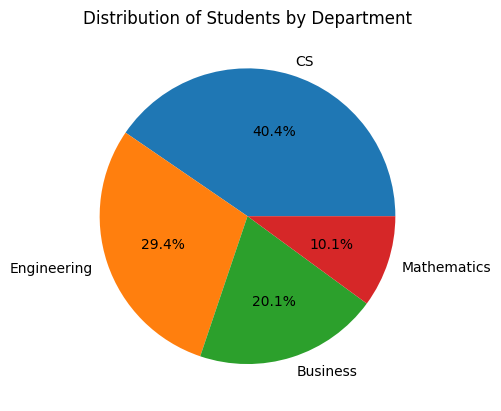

In [22]:
dept_counts = student_data['Department'].value_counts() 
plt.pie(dept_counts, labels=dept_counts.index, autopct='%0.1f%%')
plt.title("Distribution of Students by Department")
plt.show()

#  Analysis of Numeric Grades by Department

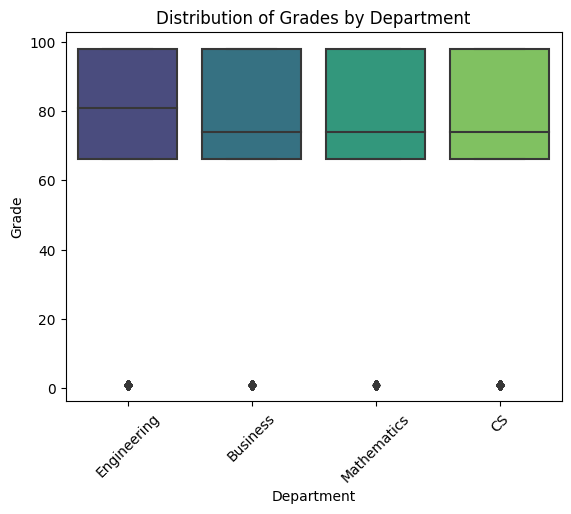

In [23]:
sns.boxplot(x=student_data['Department'], y=student_data['Grade_Numeric'], data=student_data, palette="viridis")

# Add title and labels
plt.title("Distribution of Grades by Department")
plt.xlabel("Department")
plt.ylabel("Grade")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

-  **Engineering** has the **highest median grade** but shows more variability in student performance.  
-  **Business, Mathematics, and CS** have similar median grades, with a **consistent distribution** across students.  
-  **All departments** have grades ranging from **60 to 100**, showing a balanced distribution with no major outliers.  